# Régression polynomiale

## 1) Implémentation du modèle de régression linéaire au dataset positions/salaires

In [1]:
import pandas as pd
from matplotlib import pyplot as pp
import numpy as np

In [2]:
#Import des données :
data = pd.read_csv("./data/Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


Text(0, 0.5, 'Salaire')

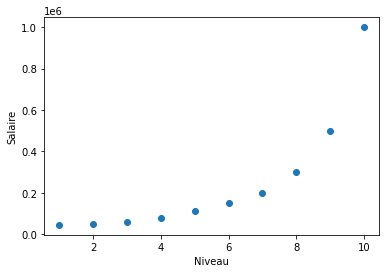

In [3]:
pp.scatter(data["Level"],data["Salary"])
pp.xlabel("Niveau")
pp.ylabel("Salaire")

In [4]:
x = np.array(data["Level"])
x = np.expand_dims(x, 0)
x = np.transpose(x)
print(x.shape)

(10, 1)


In [5]:
y = np.array(data["Salary"])
y = np.expand_dims(y, 0)
y = np.transpose(y)
print(y.shape)

(10, 1)


In [6]:
biais = np.ones_like(y)
print(biais.shape)

(10, 1)


In [7]:
#On crée nos features polynomiales :
deg = 3

X = np.copy(x)

for d in range(2,deg+1):
    colonnes = []
    feat_pol = x**(d)
    X = np.concatenate((feat_pol, X),axis = 1)

#Ajout de la colonne de biais :
X = np.concatenate((X, biais),axis = 1)

X.shape


(10, 4)

In [8]:
#On initialise les paramètres aléatoires selon notre nombre de degrés polynomiaux (d+1):
theta = np.random.randn(deg+1,1)
print(theta.shape)
theta

(4, 1)


array([[-1.07087871],
       [ 0.83947378],
       [-0.06677961],
       [-0.18495064]])

In [9]:
def model (X, theta):
    return X.dot(theta)

y_modele = model(X, theta)

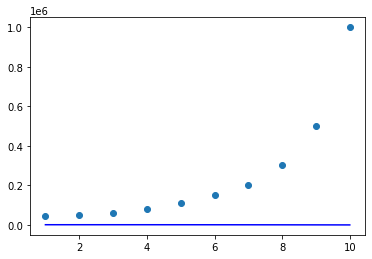

In [10]:
pp.scatter(data["Level"],data["Salary"])
pp.plot(x, y_modele, color = "blue")

In [11]:
def fonc_cout (X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta) - y )**2)

fonc_cout(X, y, theta)

71617068295.44069

In [12]:
def grad (X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [13]:
#On initialise les paramètres aléatoires selon notre nombre de degrés polynomiaux (d+1):
theta = np.random.randn(deg+1,1)
print(theta.shape)
theta

def desc_grad (X, y, theta, alpha, nb_iter) :
    evolution_cout = np.zeros(nb_iter)

    for i in range(0, nb_iter):
        theta = theta - alpha*grad(X, y, theta)
        evolution_cout[i] = fonc_cout(X,y,theta)

    return theta, evolution_cout

theta, evolution_cout = desc_grad(X, y, theta, 0.0000001, 300)
y_modele = np.dot(X,theta)

(4, 1)


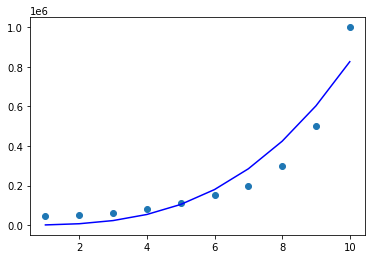

In [14]:
pp.scatter(data["Level"],data["Salary"])
pp.plot(data["Level"], y_modele, color = "blue")

In [15]:
coef_r2 = 1-((y-y_modele)**2).sum()/((y-y.mean())**2).sum()

coef_r2

0.9130287088766544

Notre modèle explique une part de 91% de la variabilité de y.

**Conclusion** : notre modèle est relativement bien ajusté aux données.

Text(0.5, 1.0, 'Evolution du coût du modèle dans le temps')

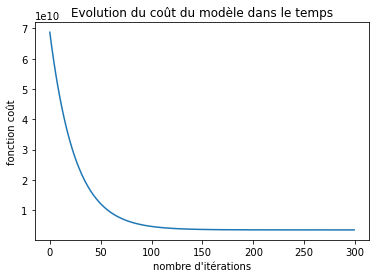

In [16]:
pp.plot(range(len(evolution_cout.reshape(-1,1))), evolution_cout.reshape(-1,1))
pp.xlabel("nombre d'itérations")
pp.ylabel("fonction coût")
pp.title("Evolution du coût du modèle dans le temps")

A en juger par l'asymptote visible, on pourrait avoir un modèle équivalent avec un peu moins d'itérations. Tout dépend du niveau minmimum que l'on souhaite pour le R2.

## 2) Implémentation du modèle de régression linéaire au dataset Vin rouge

In [17]:
df = pd.read_csv("./data/qualite-vin-rouge.csv")
df.head()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Sélection de  variables

In [18]:
import matplotlib

In [19]:
df.corr()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
acidité fixe,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
acidité volatile,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
acide citrique,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
sucre résiduel,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorures,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
dioxyde de soufre libre,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
anhydride sulfureux total,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
densité,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [20]:
a = np.array(df["alcool"]).reshape(-1,1)
b = np.array(df["sulphates"]).reshape(-1,1)
c = np.array(df["acidité volatile"]).reshape(-1,1)
d = np.array(df["acide citrique"]).reshape(-1,1)

x = np.concatenate((a,b,c,d), axis = 1)
#x = np.array(df.iloc[:,0:10]).reshape(-1,10)
print(x.shape)

y = np.array(df.iloc[:,-1]).reshape(-1,1)
print(y.shape)

(1599, 4)
(1599, 1)


In [21]:
biais = np.ones_like(y)
print(biais.shape)
biais

(1599, 1)


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [22]:
X = np.concatenate((x,biais),axis=1)
X.shape

(1599, 5)

Text(0, 0.5, 'qualité')

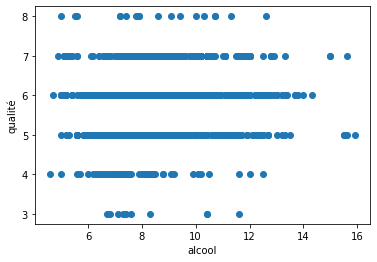

In [23]:
pp.scatter(df.iloc[:,0],df.iloc[:,-1])
pp.xlabel("alcool")
pp.ylabel("qualité")

In [24]:
theta = np.random.randn(X.shape[1],1)
print(theta.shape)
theta

(5, 1)


array([[-0.47303718],
       [-0.74577544],
       [-0.17332432],
       [ 0.2756788 ],
       [-1.12388646]])

In [25]:
theta, evolution_cout = desc_grad(X, y, theta, 0.005, 10000)
y_modele = np.dot(X,theta)

In [26]:
fonc_cout(X, y, theta)

0.23980550486565916

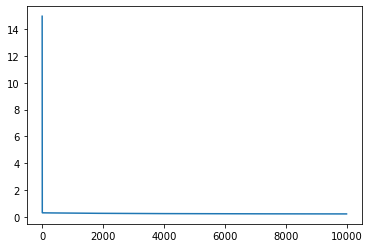

In [27]:
pp.plot(range(len(evolution_cout.reshape(-1,1))), evolution_cout.reshape(-1,1))

In [28]:
model(X[429].reshape(1,X.shape[1]), theta)

array([[5.64774403]])

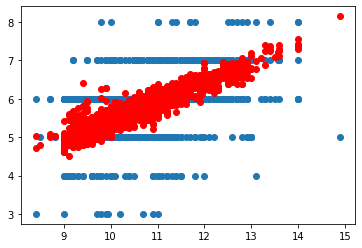

In [29]:
pp.scatter(x[:,0], y)
pp.scatter(x[:,0], y_modele, c = 'r')

In [30]:
coef_r2 = 1-((y-y_modele)**2).sum()/((y-y.mean())**2).sum()

coef_r2

0.2641300287129884

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_modele)

0.4796110097313183

In [32]:
'''from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)
y_modele = regressor.predict(X)
'''

from sklearn.metrics import r2_score
r2_score(y, y_modele)

0.2641300287129884